In [1]:
# %load /home/hwixley/Documents/Year3/IAML/cwk2/INFR10069-2020-CW2/helpers/iaml01cw2_helpers.py
#
#  Helper functions for IAML 2020/21 cw2
#
import os
import gzip
import numpy as np

#
#  This function is after  https://github.com/zalandoresearch/fashion-mnist
#
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

#
#------ IAML original functions ---------------
#
def load_FashionMNIST(data_path):
    Xtrn, Ytrn = load_mnist(data_path, "train")
    Xtst, Ytst = load_mnist(data_path, "t10k")
    return Xtrn.astype(np.float), Ytrn, Xtst.astype(np.float), Ytst

def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst


In [2]:

##########################################################
#  Python script template for Question 2 (IAML Level 10)
#  Note that
#  - You should not change the filename of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data:
import os
dataPath = os.path.join(os.getcwd(),'../data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(dataPath)
Xtrn_orig = Xtrn.copy
Xtst_orig = Xtst.copy
Xtrn = Xtrn/255
Xtst = Xtst/255

Xmean = Xtrn.mean(0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

# Q2.1
def iaml01cw2_q2_1():
    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    
    print("starting...")
    print()
    lr = LogisticRegression()
    lr.fit(Xtrn_nm,Ytrn)
    pred = lr.predict(Xtst_nm)
    
    print("FREQUENCY CONFUSION MATRIX:")
    print()
    cm = pd.crosstab(pred,Ytst,rownames=["Actual"],colnames=["Predicted"])
    print(cm.round(3))
    print()
    print()
    print("PERCENTAGE CONFUSION MATRIX:")
    print()
    cm2 = cm/np.sum(cm,axis=1)
    print((cm2*100).round(1))
    print()
    print()
    print("Total classification accuracy = " + str((((cm*np.identity(10)).sum().sum()/cm.sum().sum())*100).round(3)) + "%")
    
#
# iaml01cw2_q2_1()   # comment this out when you run the function

# Q2.2
def iaml01cw2_q2_2():
    from sklearn.svm import SVC
    import pandas as pd
    
    print("starting...")
    print()
    svc = SVC(kernel = "rbf", C=1.0, gamma = "auto")
    svc.fit(Xtrn_nm,Ytrn)
    pred = svc.predict(Xtst_nm)
    
    print("FREQUENCY CONFUSION MATRIX:")
    print()
    cm = pd.crosstab(pred,Ytst,rownames=["Actual"],colnames=["Predicted"])
    print(cm.round(3))
    print()
    print()
    print("PERCENTAGE CONFUSION MATRIX:")
    print()
    cm2 = cm/np.sum(cm,axis=1)
    print((cm2*100).round(1))
    print()
    print()
    print("Mean classification accuracy = " + str((((cm2*np.identity(10)).sum().sum()/10)*100).round(3)) + "%")
    
#
# iaml01cw2_q2_2()   # comment this out when you run the function

# Q2.3
def iaml01cw2_q2_3():
    from sklearn.linear_model import LogisticRegression
    from sklearn.decomposition import PCA
    import statistics as stats
    from matplotlib.colors import ListedColormap

    print("starting...")
    print()
    lr = LogisticRegression()
    lr.fit(Xtrn_nm[0:40,],Ytrn[0:40,])
    pred = lr.predict(Xtst_nm)
    
    pca1 = PCA().fit(Xtrn_nm)
    V = pca1.components_
    
    pca = PCA(n_components=2).fit(Xtrn_nm)
    newXtst_nm = pca.transform(Xtst_nm)
    
    z0 = newXtst_nm[:,0]
    z1 = newXtst_nm[:,1]
    
    #z = np.zeros((10000,784))
    #z[:,0] = z0
    #z[:,1] = z1
    
    pc0 = pca.components_[0]
    pc1 = pca.components_[1]
    
    pc0Stdev = stats.stdev(pc0)
    pc1Stdev = stats.stdev(pc1)
    
    x = np.linspace(-5*pc0Stdev,5*pc0Stdev,784)
    y = np.linspace(-5*pc1Stdev,5*pc1Stdev,784)

    inputs = np.empty((2,784))
    inputs[0,:] = x
    inputs[1,:] = y
    
    z = np.matmul(pca.components_.T,inputs)
    
    colors = plt.cm.get_cmap("coolwarm")(np.linspace(0,1,10))
    newCmap = ListedColormap(colors)
    
    cs = plt.contourf(x,y,z,cmap=newCmap)
        
    cbar = plt.colorbar(cs)
    cbar.ax.set_yticklabels(["0","1","2","3","4","5","6","7","8","9"])
    cbar.set_label("\nClass")
    
    plt.xlim(-5*pc0Stdev,5*pc0Stdev)
    plt.ylim(-5*pc1Stdev,5*pc1Stdev)
    plt.title("A graph to show the 2D decision regions for our\ntrained logistic regression classifier")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    newX = [-5*pc0Stdev,-2.5*pc0Stdev,0,2.5*pc0Stdev,5*pc0Stdev]
    plt.xticks(newX,["-5$\sigma_1$","-2.5$\sigma_1$","0$\sigma_1$","2.5$\sigma_1$","5$\sigma_1$"])
    newY = [-5*pc1Stdev,-2.5*pc1Stdev,0,2.5*pc1Stdev,5*pc1Stdev]
    plt.yticks(newY,["-5$\sigma_2$","-2.5$\sigma_2$","0$\sigma_2$","2.5$\sigma_2$","5$\sigma_2$"])
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()
#
# iaml01cw2_q2_3()   # comment this out when you run the function

# Q2.4
#def iaml01cw2_q2_4():
#
# iaml01cw2_q2_4()   # comment this out when you run the function

# Q2.5
def iaml01cw2_q2_5():
    from sklearn.svm import SVC
    from sklearn.model_selection import cross_val_score
    import math
        
    print("starting...")    
        
    Xsmall = np.empty((10000,784))
    Ysmall = np.empty(10000)
    classAmounts = np.zeros(10)
    
    #Initialize Xsmall and Ysmall
    index = 0
    for row in range(Xtrn_nm.shape[0]):
        
        label = Ytrn[row]
        
        if classAmounts[label] < 1000:
            Xsmall[index,:] = Xtrn_nm[row,:]
            Ysmall[index] = label
            classAmounts[label] += 1
            index += 1
            
        if classAmounts.sum() == 10000:
            break
    
    
    C = np.logspace(-2,3,10,endpoint=True)
    print(C)
    accuracies = np.empty(10)
    
    #Iterate through each value of C
    for i in range(C.size):
        c = C[i]
        print(c)
        
        #Initialize our SVM model
        svc = SVC(kernel = "rbf", C=c, gamma = "auto")
        
        #Get the cross-validated classification accuracy
        score = cross_val_score(svc,Xsmall,Ysmall,cv=3)
        accuracies[i] = np.sum(score)/len(score)
        print(accuracies[i])
    
    print(accuracies)
    print()
    plt.scatter(C,accuracies,c="black")
    plt.plot(C,accuracies,c="black")
    
    maxIndex = accuracies.index(max(accuracies))
    plt.plot(C[maxIndex],accuracies,c="red",label="Highest mean accuracy")
    plt.legend
    
    plt.grid(True)
    plt.xscale('log')
    plt.xlabel("C")
    plt.ylabel("3-fold cross-validated classification accuracy")
    plt.title("A graph to show the relationship between the regularisation\nparameter C and the cross-validation accuracy")
        
    
#
# iaml01cw2_q2_5()   # comment this out when you run the function

# Q2.6 
#def iaml01cw2_q2_6():
#
# iaml01cw2_q2_6()   # comment this out when you run the function



/home/hwixley/packages/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


starting...
[1.00000000e-02 3.59381366e-02 1.29154967e-01 4.64158883e-01
 1.66810054e+00 5.99484250e+00 2.15443469e+01 7.74263683e+01
 2.78255940e+02 1.00000000e+03]
0.01
0.6481958005910101
0.03593813663804628
0.6910976845108582
0.1291549665014884
0.7367022711334088
0.464158883361278
0.783804163444882
1.6681005372000592
0.8197017376658096
5.994842503189409
0.8447012881144618
21.544346900318846
0.8565023106939273
77.42636826811278
0.8542039045033057
278.2559402207126
0.8495030959102815
1000.0
0.8406013798229367
[0.6481958  0.69109768 0.73670227 0.78380416 0.81970174 0.84470129
 0.85650231 0.8542039  0.8495031  0.84060138]



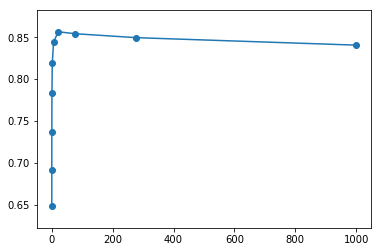

In [3]:
iaml01cw2_q2_5()